In [1]:
from pymongo import MongoClient

In [2]:
client = MongoClient()

In [3]:
db = client['parking']

In [4]:
tickets = db['tickets']

In [5]:
type(tickets)

pymongo.collection.Collection

In [6]:
tickets.find_one()

{'Agency': 2,
 'Body Style': 'PA',
 'Color': 'WH',
 'Fine amount': '',
 'Issue Date': '2015-12-26T00:00:00',
 'Issue time': 1515,
 'Latitude': 6440041.1,
 'Location': '100 WORLD WAY',
 'Longitude': 1802686.2,
 'Make': 'ACUR',
 'Marked Time': '',
 'Meter Id': '',
 'Plate Expiry Date': '',
 'RP State Plate': 'CA',
 'Route': '2F11',
 'Ticket number': 1104820732,
 'VIN': '',
 'Violation Description': '17104h',
 'Violation code': 0,
 '_id': ObjectId('5cec6ea076a3c2e1ee05149d')}

In [7]:
data = tickets.find().limit(2)

In [9]:
data

In [10]:
registration_tickets = tickets.find({'Violation Description':
                                     {'$eq': 'NO EVIDENCE OF REG'}}).limit(10)

In [11]:
registration_tickets[0]

{'Agency': 1,
 'Body Style': 'PA',
 'Color': 'GY',
 'Fine amount': 50,
 'Issue Date': '2015-12-21T00:00:00',
 'Issue time': 1251,
 'Latitude': 99999,
 'Location': '13147 WELBY WAY',
 'Longitude': 99999,
 'Make': 'HOND',
 'Marked Time': '',
 'Meter Id': '',
 'Plate Expiry Date': 200304,
 'RP State Plate': 'CA',
 'Route': 1521,
 'Ticket number': 1103341116,
 'VIN': '',
 'Violation Description': 'NO EVIDENCE OF REG',
 'Violation code': '4000A1',
 '_id': ObjectId('5cec6ea076a3c2e1ee05149e')}

In [13]:
registration_tickets = tickets.find({'Violation Description':
                                     {'$eq': 'NO EVIDENCE OF REG'}},
                                   {'Make': 1, '_id': 0})

In [14]:
registration_tickets[0]

{'Make': 'HOND'}

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
df = pd.io.json.json_normalize(registration_tickets)

In [19]:
df.head()

,Make
0,BMW
1,NISS
2,TOYO
3,HYUN
4,FORD


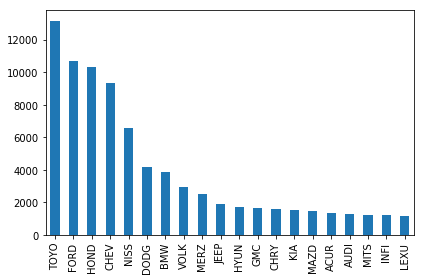

In [29]:
ax = df['Make'].value_counts()[:20].plot.bar()
plt.tight_layout()

In [28]:
fig = ax.get_figure()
fig.savefig('barplot.jpg')

In [30]:
client.close()